<a href="https://colab.research.google.com/github/amkusmec/CERIS_PAG/blob/main/Copy_of_CERIS_PAG_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup

Run the following three code blocks to load the data, packages, and functions required for CERIS-JGRA.

In [2]:
system("git clone https://github.com/amkusmec/CERIS_PAG/")


In [4]:
 if (!require(colorspace)) install.packages("colorspace")
 if (!require(rrBLUP)) install.packages("rrBLUP")

Loading required package: rrBLUP

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘rrBLUP’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
cwd <- '/content/CERIS_PAG/' # This is the location of the files cloned into your Google Drive
source(paste0(cwd, 'Sub_functions_PAG.r'))

## Some text

Organism | Trait Code | Trait name
-------- | ---------- | ----------
Sorghum  | FTgdd      | GDD to flowering
Wheat    | GY         | Grain yield

In [ ]:
experiment <- 'Sorghum'
trait <- "FTgdd"

In [ ]:
 exp_dir <- paste(cwd, experiment, '/', sep = '')
 env_meta_file <- paste(exp_dir, 'Env_meta_table.txt', sep = ''); ## make sure the PlantingData formated as 'YYYY-MM-DD'
 env_meta_info_0 <- read.table(env_meta_file, header = T, sep = "\t", stringsAsFactors = F);

 if (experiment == '1Sorghum') { searching_days <- 122; trait <- 'FTgdd'};
 if (experiment == '2Idaho') { searching_days <- 150; trait <- 'GY'};
 exp_traits_file <- paste(exp_dir, 'Traits_record.txt', sep = '');
 exp_traits <- read.table(exp_traits_file, sep = "\t", header = T, stringsAsFactors = F, na.string = 'NA');

 all_env_codes <- unique(exp_traits$env_code);
 env_cols <- rainbow_hcl(length(all_env_codes), c = 80, l = 60, start = 0, end = 300, fixup = TRUE, alpha = 0.75);

 envParas_file <- paste(exp_dir, length(all_env_codes), 'Envs_envParas_DAP', searching_days, '.rds', sep = '');
 if ( !file.exists(envParas_file) ) { Compile_Envirome_Matrix(exp_dir, all_env_codes, envParas_file) };
 load(envParas_file);

 Paras <- colnames(envParas[[1]])

In [ ]:
 lInd <- which(colnames(exp_traits) == 'line_code'); eInd <- which(colnames(exp_traits) == 'env_code'); tInd <- which(colnames(exp_traits) == trait);
 exp_trait_dir <- paste(exp_dir, trait,  '/',  sep = ''); if (!dir.exists(exp_trait_dir))  { dir.create(exp_trait_dir, recursive= T)};
 exp_trait <- exp_traits[,c(lInd, eInd, tInd)];

 colnames(exp_trait)[3] <- 'Yobs';
 exp_trait <- aggregate(Yobs ~  line_code + env_code, data = exp_trait, mean) ## To make sure only one phenotype record per each line in each environment
 exp_trait <- exp_trait[!is.na(exp_trait$Yobs),];

 line_codes <- unique(exp_trait$line_code);
 env_mean_trait_0 <- na.omit(aggregate(x = exp_trait$Yobs, by = list(env_code = exp_trait$env_code), mean, na.rm = T));
 colnames(env_mean_trait_0)[2] <- 'meanY';
 env_mean_trait <- merge(env_mean_trait_0, env_meta_info_0)
 env_mean_trait <- env_mean_trait[order(env_mean_trait$meanY),];
### two figures and the correspondent output files will be saved in the trait directory;
 FW_Model(exp_trait, exp_trait_dir, trait, all_env_codes, env_mean_trait, env_meta_info_0);


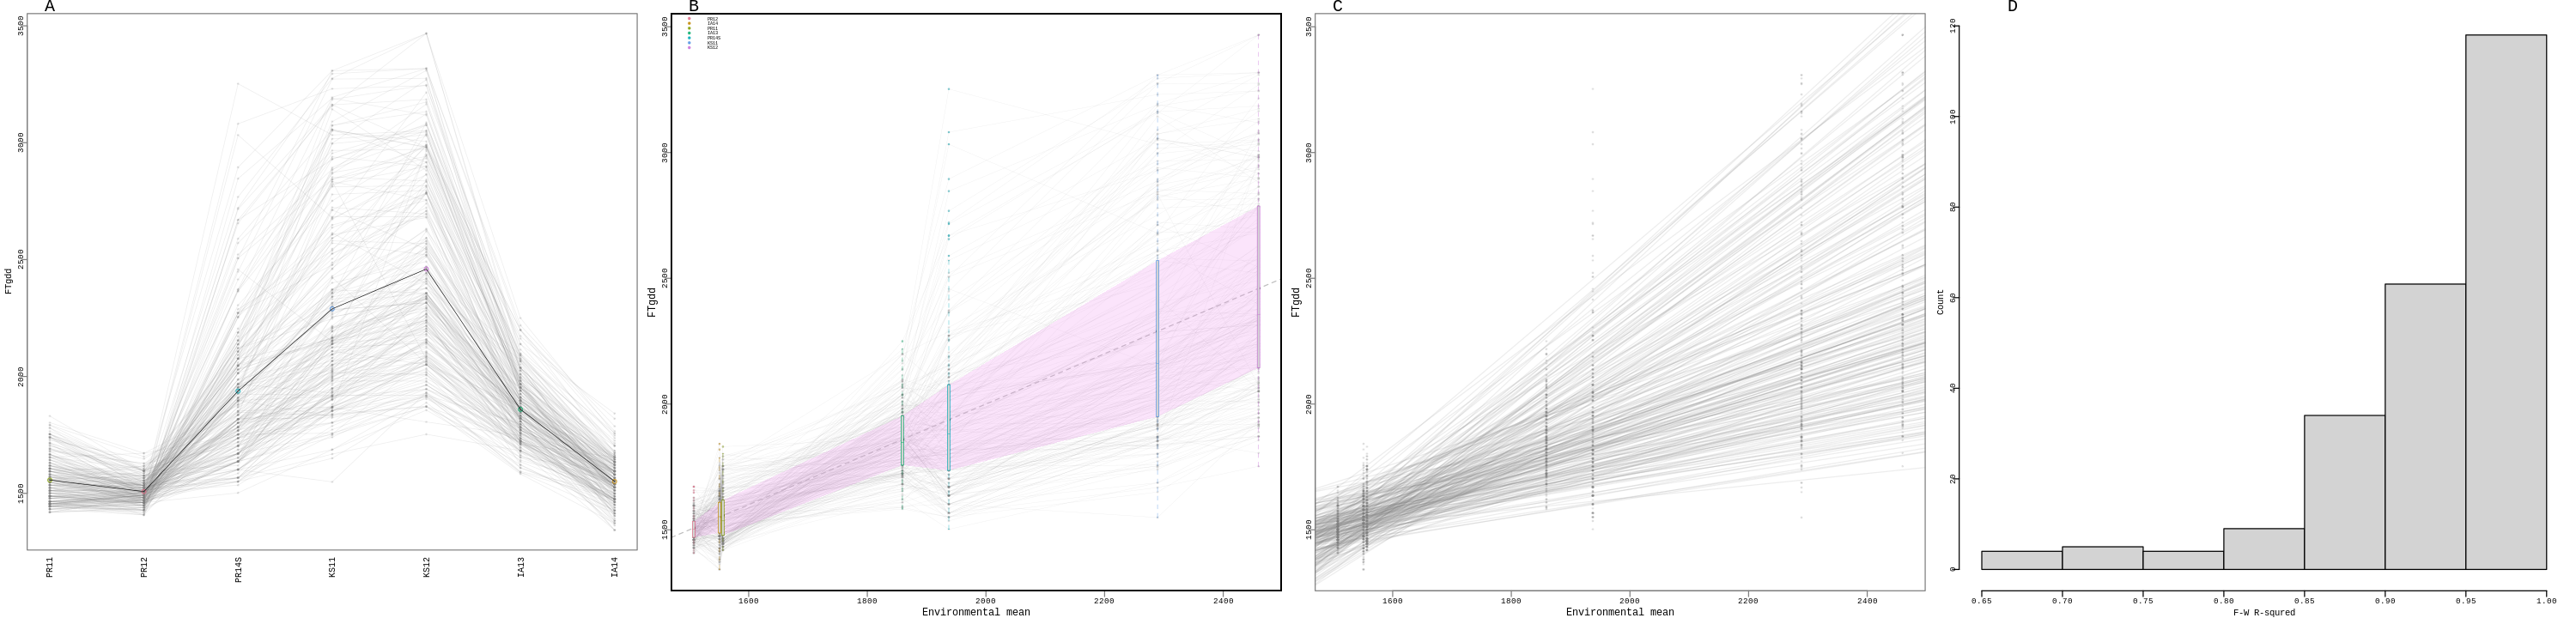

In [ ]:
options(repr.plot.width=25, repr.plot.height=6, repr.plot)
FW_Model(exp_trait, exp_trait_dir, trait, all_env_codes, env_mean_trait, env_meta_info_0);

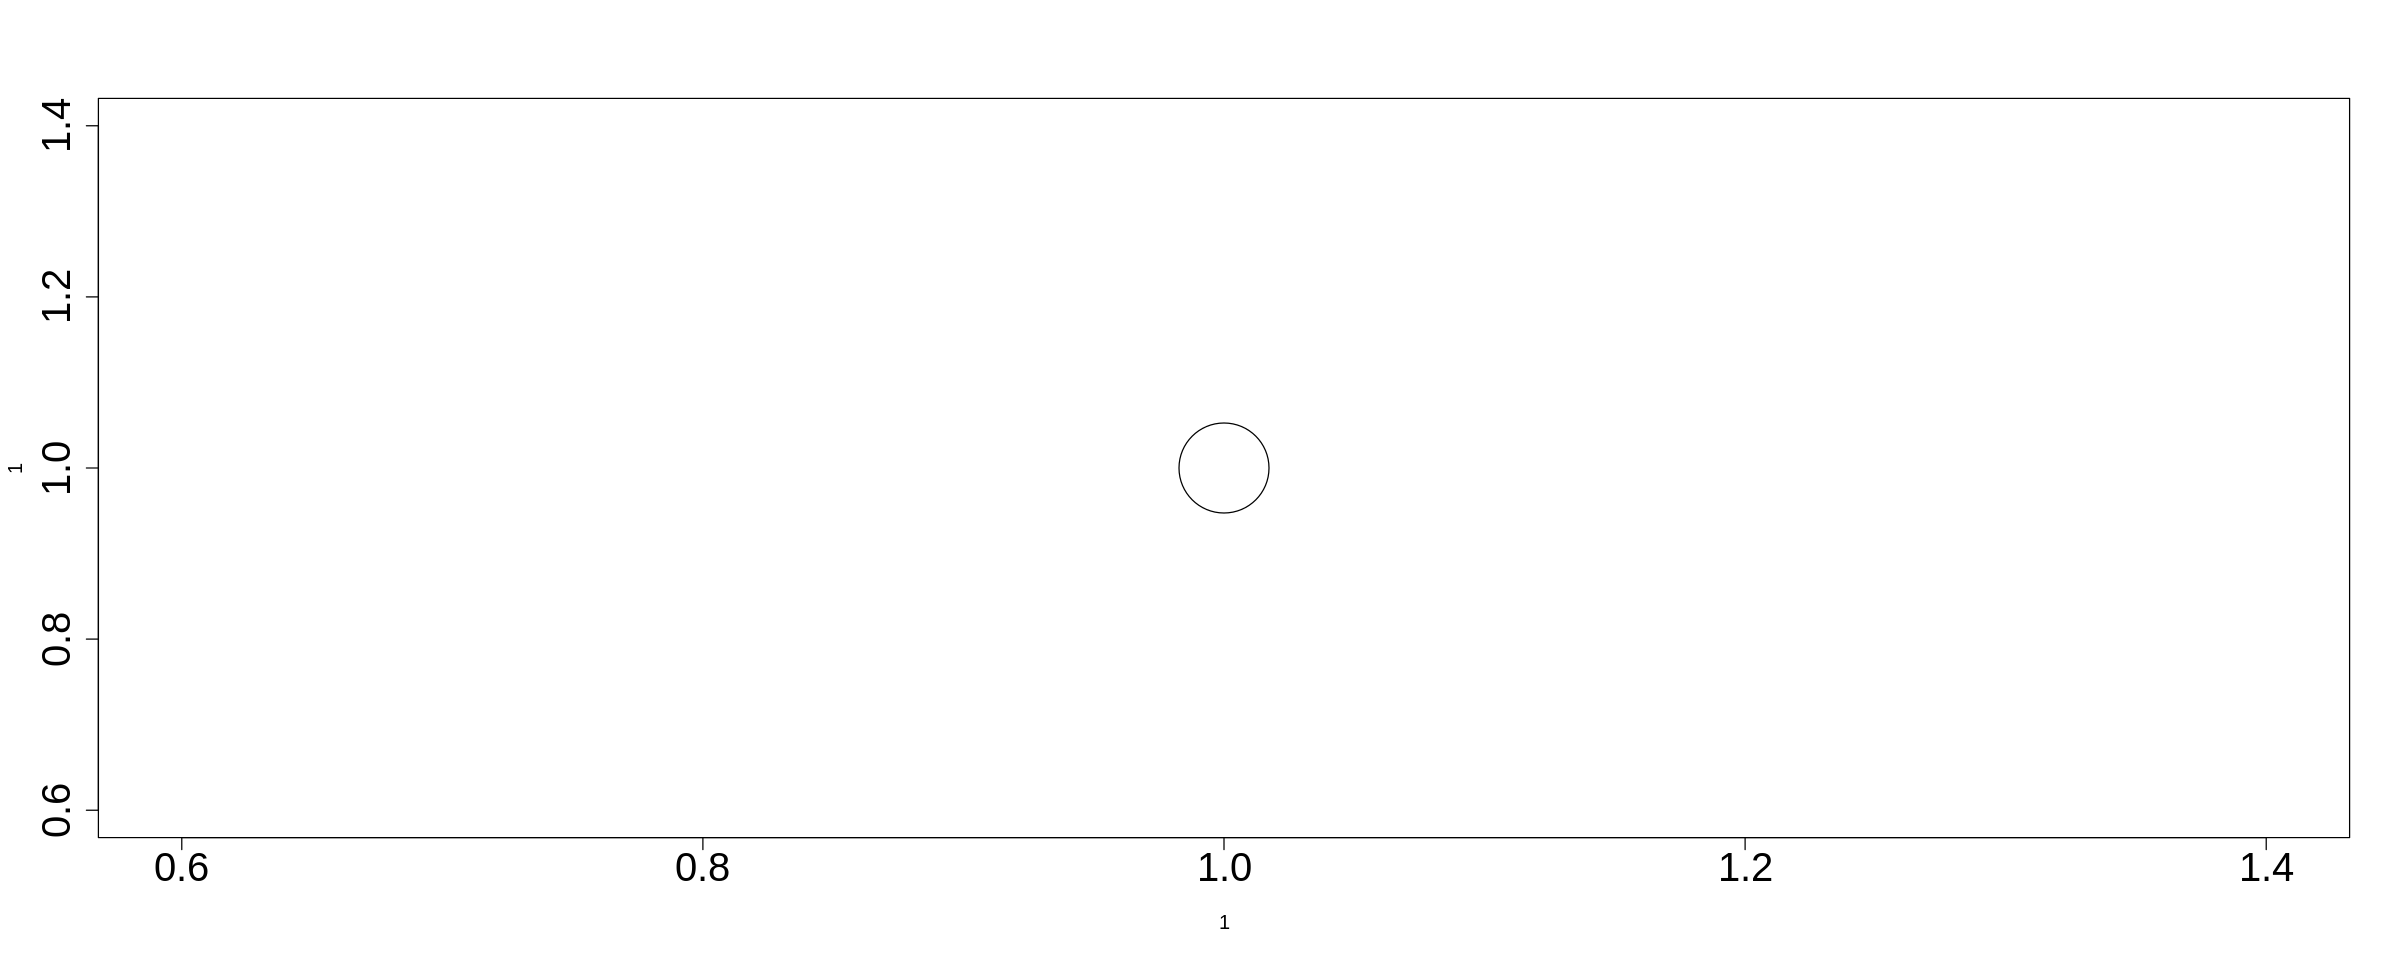

In [ ]:
options(repr.plot.width=20, repr.plot.height=8)
plot(1, 1, cex = 10, cex.axis = 2)